In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("weather_classification_data.csv")

In [4]:
data.shape

(13200, 11)

In [5]:
data["Weather Type"].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [6]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [7]:
data["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [8]:
data.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [10]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [11]:
data = data.drop(["Cloud Cover", "Season", "Location"], axis=1)

In [12]:
le = LabelEncoder()
data["Weather Type"] = le.fit_transform(data["Weather Type"])

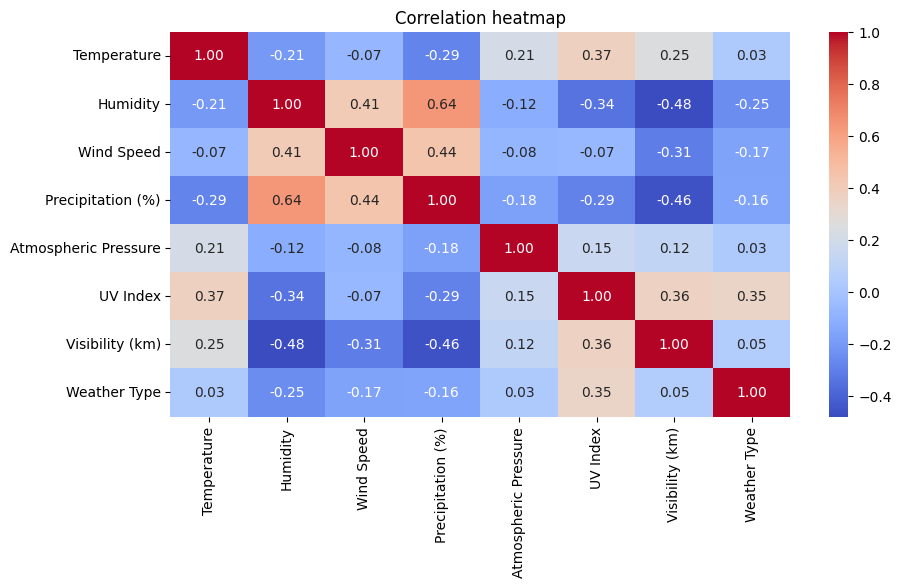

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True, cmap="coolwarm" ,fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

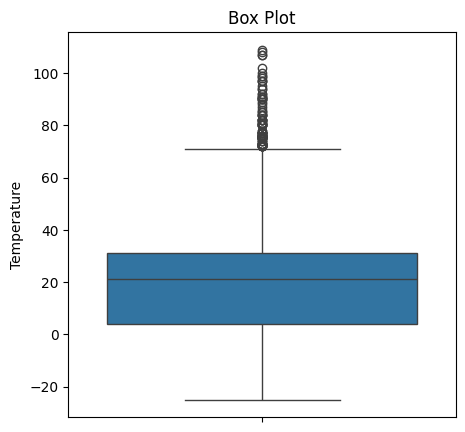

In [14]:
plt.figure(figsize=(5, 5))
sns.boxplot(y=data['Temperature'])
plt.title('Box Plot')
plt.show()

In [15]:
# Q1 = data["Temperature"].quantile(0.25)
# Q3 = data["Temperature"].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# data = data[(data["Temperature"] >= lower_bound) & 
#             (data["Temperature"] <= upper_bound)]

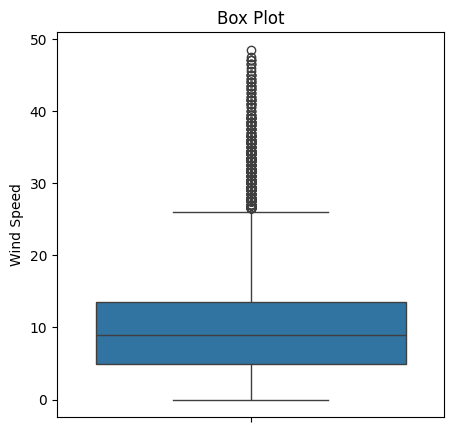

In [16]:
plt.figure(figsize=(5, 5))
sns.boxplot(y=data['Wind Speed'])
plt.title('Box Plot')
plt.show()

In [17]:
# Q1 = data["Wind Speed"].quantile(0.25)
# Q3 = data["Wind Speed"].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# data = data[(data["Wind Speed"] >= lower_bound) & 
#             (data["Wind Speed"] <= upper_bound)]

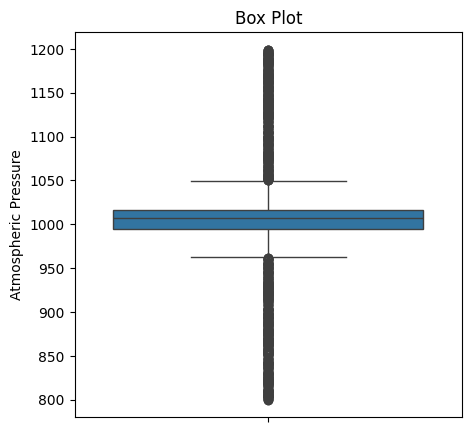

In [18]:

plt.figure(figsize=(5, 5))
sns.boxplot(y=data['Atmospheric Pressure'])
plt.title('Box Plot')
plt.show()

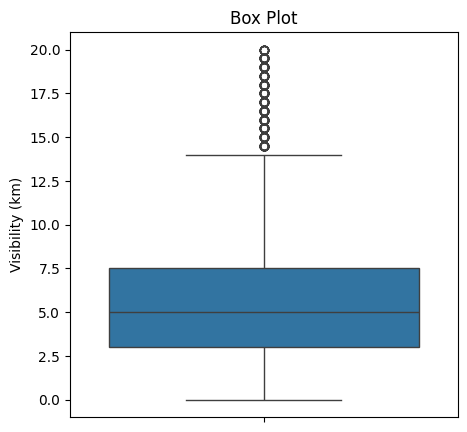

In [19]:
plt.figure(figsize=(5, 5))
sns.boxplot(y=data['Visibility (km)'])
plt.title('Box Plot')
plt.show()

In [20]:
Q1 = data["Visibility (km)"].quantile(0.25)
Q3 = data["Visibility (km)"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data["Visibility (km)"] >= lower_bound) & 
            (data["Visibility (km)"] <= upper_bound)]

In [21]:
X = data.drop("Weather Type", axis=1)
y = data["Weather Type"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type
0,14.0,73,9.5,82.0,1010.82,2,3.5,1
1,39.0,96,8.5,71.0,1011.43,7,10.0,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,3
3,38.0,83,1.5,82.0,1026.25,7,1.0,3
4,27.0,74,17.0,66.0,990.67,1,2.5,1


## Standardizing the features so all values are on the same scale.

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier

In [26]:
rf = RandomForestClassifier(n_estimators=200)

In [27]:
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred = rf.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.9313572542901716

# Support Vector Machine (SVM)

In [30]:
svc = SVC()

In [31]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [32]:
y_pred = svc.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

0.9294071762870515

# K-Nearest Neighbors (KNN)

In [35]:
knn = KNeighborsClassifier()

In [36]:
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [37]:
y_pred = knn.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.9200468018720749

# DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier()

In [40]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [41]:
y_pred = dt.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.9305772230889235

In [43]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type
0,14.0,73,9.5,82.0,1010.82,2,3.5,1
1,39.0,96,8.5,71.0,1011.43,7,10.0,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,3
3,38.0,83,1.5,82.0,1026.25,7,1.0,3
4,27.0,74,17.0,66.0,990.67,1,2.5,1


In [44]:
def weather_output_label(pred):
    labels = {
        0: "Cloudy",
        1: "Rainy",
        2: "Snowy",
        3: "Sunny"
    }
    return labels.get(pred, "Invalid Prediction")

In [ ]:
pred = dt.predict([[14.0, 73,	9.5,	82.0,	1010.82,	2,	3.5]])
output = weather_output_label(pred[0])
print(pred)
print("Weather Type: ",output)

[1]
Weather Type:  Rainy


In [46]:
data["Weather Type"].unique()

array([1, 0, 3, 2])